# Zoomcamp ML midterm project
```

README.md with
Description of the problem
Instructions on how to run the project
Data
You should either commit the dataset you used or have clear instructions how to download the dataset
Notebook (suggested name - notebook.ipynb) with
Data preparation and data cleaning
EDA, feature importance analysis
Model selection process and parameter tuning
```

# Website phishing and scam prediction

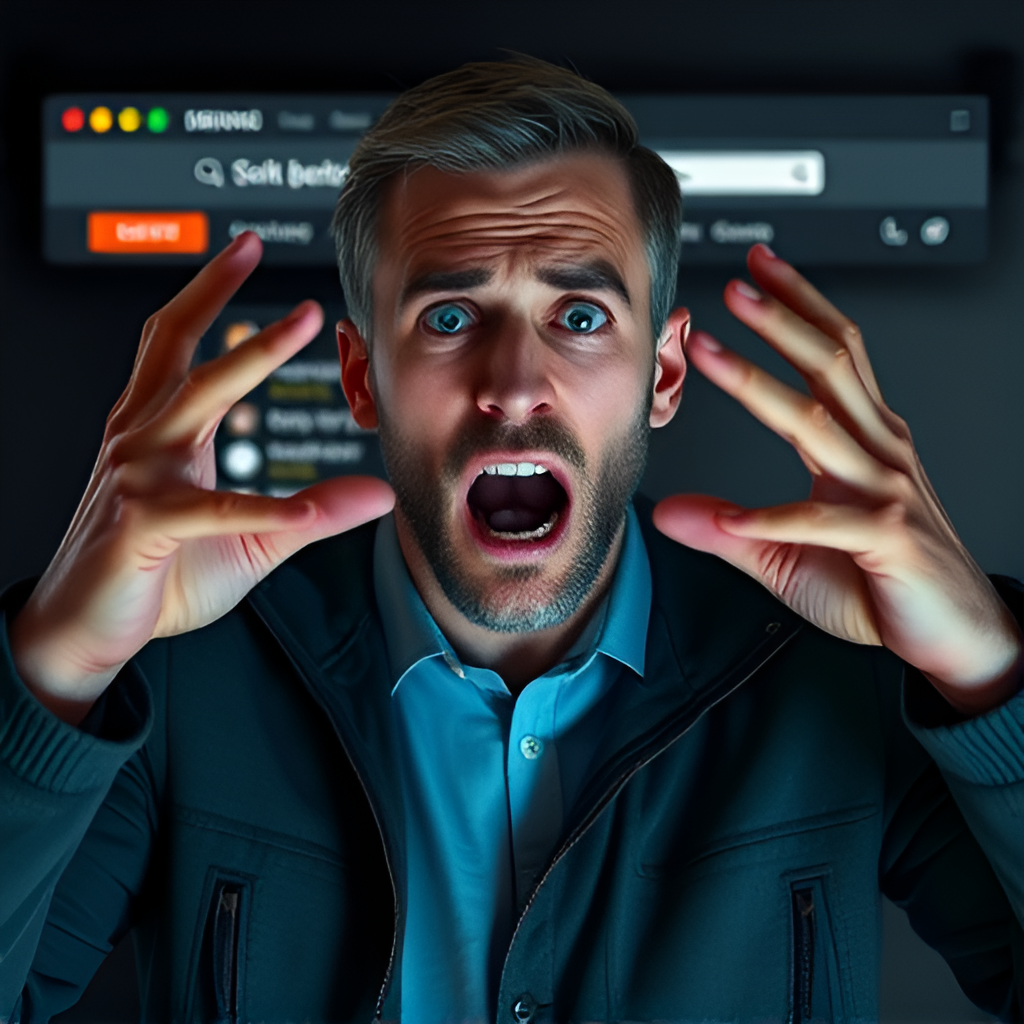

## 1. Description of the problem
```
Website phishing is a form of cyberattack where malicious actors create a fraudulent website that mimics a legitimate one. The goal is to deceive users into revealing sensitive information, such as:
Login credentials,Credit card details, Personal identification data (e.g., Social Security numbers), Account details for financial systems

These fake websites often closely resemble the appearance and URL of a trusted site, making it difficult for users to distinguish between the legitimate and malicious versions.

Techniques Used in Website Phishing
Spoofed URLs: Cybercriminals use URLs similar to legitimate websites (e.g., using "g00gle.com" instead of "google.com").
Email Phishing: Victims are lured through emails containing links to the phishing site.
Clone Websites: Replicas of legitimate websites with subtle differences.
SSL Certificates: Phishing sites might also use HTTPS to appear more authentic.
Pop-up Forms:Fake login or payment forms embedded in legitimate-looking sites.

How Website Phishing Affects Online Trading
Online trading platforms, such as stock brokerages, cryptocurrency exchanges, and e-commerce websites, are frequent targets of phishing attacks. The impact includes:
1. Loss of Sensitive Information
2. Theft of Funds
3. Compromised Reputation
4. Fraudulent Trades and Market Manipulation
5. Identity Theft
6. Loss of Business Opportunities


The goal is to use set collected features to predict phishing websites and avoid/minize losses.
```

## 1.1 Data source
```
https://archive.ics.uci.edu/dataset/327/phishing+websites
```

In [1]:
!pip install -q scipy

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text
from sklearn.linear_model import LogisticRegression



# 2. Load data

In [11]:
from scipy.io import arff
import pandas as pd

# Load ARFF file
data, meta = arff.loadarff(r'Training Dataset.arff')

# Convert to Pandas DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df.head()


having_IP_Address URL_Length Shortining_Service having_At_Symbol  \
0             b'-1'       b'1'               b'1'             b'1'   
1              b'1'       b'1'               b'1'             b'1'   
2              b'1'       b'0'               b'1'             b'1'   
3              b'1'       b'0'               b'1'             b'1'   
4              b'1'       b'0'              b'-1'             b'1'   

  double_slash_redirecting Prefix_Suffix having_Sub_Domain SSLfinal_State  \
0                    b'-1'         b'-1'             b'-1'          b'-1'   
1                     b'1'         b'-1'              b'0'           b'1'   
2                     b'1'         b'-1'             b'-1'          b'-1'   
3                     b'1'         b'-1'             b'-1'          b'-1'   
4                     b'1'         b'-1'              b'1'           b'1'   

  Domain_registeration_length Favicon  ... popUpWidnow Iframe age_of_domain  \
0                       b'-1'    b'1'  ...        b'1'   b'1'         b'-1'   
1                       b'-1'    b'1'  ...        b'1'   b'1'         b'-1'   
2                       b'-1'    b'1'  ...        b'1'   b'1'          b'1'   
3                        b'1'    b'1'  ...        b'1'   b'1'         b'-1'   
4                       b'-1'    b'1'  ...       b'-1'   b'1'         b'-1'   

  DNSRecord web_traffic Page_Rank Google_Index Links_pointing_to_page  \
0     b'-1'       b'-1'     b'-1'         b'1'                   b'1'   
1     b'-1'        b'0'     b'-1'         b'1'                   b'1'   
2     b'-1'        b'1'     b'-1'         b'1'                   b'0'   
3     b'-1'        b'1'     b'-1'         b'1'                  b'-1'   
4     b'-1'        b'0'     b'-1'         b'1'                   b'1'   

  Statistical_report Result  
0              b'-1'  b'-1'  
1               b'1'  b'-1'  
2              b'-1'  b'-1'  
3               b'1'  b'-1'  
4               b'1'   b'1'  

[5 rows x 31 columns]

## 2.1 Convert the data types

In [ ]:
# Decode all byte-string columns into int
for column in df.columns:
    if df[column].dtype == 'object':  # Byte strings are usually stored as 'object' dtype
        try:
            df[column] = df[column].str.decode('utf-8').astype(int)  # Decode to regular strings
        except AttributeError:
            pass  # Column doesn't contain byte strings

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

In [15]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

having_ip_address  url_length  shortining_service  having_at_symbol  \
0                 -1           1                   1                 1   
1                  1           1                   1                 1   
2                  1           0                   1                 1   
3                  1           0                   1                 1   
4                  1           0                  -1                 1   

   double_slash_redirecting  prefix_suffix  having_sub_domain  sslfinal_state  \
0                        -1             -1                 -1              -1   
1                         1             -1                  0               1   
2                         1             -1                 -1              -1   
3                         1             -1                 -1              -1   
4                         1             -1                  1               1   

   domain_registeration_length  favicon  ...  popupwidnow  iframe  \
0                           -1        1  ...            1       1   
1                           -1        1  ...            1       1   
2                           -1        1  ...            1       1   
3                            1        1  ...            1       1   
4                           -1        1  ...           -1       1   

   age_of_domain  dnsrecord  web_traffic  page_rank  google_index  \
0             -1         -1           -1         -1             1   
1             -1         -1            0         -1             1   
2              1         -1            1         -1             1   
3             -1         -1            1         -1             1   
4             -1         -1            0         -1             1   

   links_pointing_to_page  statistical_report  result  
0                       1                  -1      -1  
1                       1                   1      -1  
2                       0                  -1      -1  
3                      -1                   1      -1  
4                       1                   1       1  

[5 rows x 31 columns]

# 3 EDA

In [19]:
#all coloumns are 1 or -1
#print columns with more than two values
for col in df.columns:
    
    x = df[col].value_counts()
    if len(x) > 2:
        print(f'*** {col} **')
        print(x)

*** url_length **
url_length
-1    8960
 1    1960
 0     135
Name: count, dtype: int64
*** having_sub_domain **
having_sub_domain
 1    4070
 0    3622
-1    3363
Name: count, dtype: int64
*** sslfinal_state **
sslfinal_state
 1    6331
-1    3557
 0    1167
Name: count, dtype: int64
*** url_of_anchor **
url_of_anchor
 0    5337
-1    3282
 1    2436
Name: count, dtype: int64
*** links_in_tags **
links_in_tags
 0    4449
-1    3956
 1    2650
Name: count, dtype: int64
*** sfh **
sfh
-1    8440
 1    1854
 0     761
Name: count, dtype: int64
*** web_traffic **
web_traffic
 1    5831
-1    2655
 0    2569
Name: count, dtype: int64
*** links_pointing_to_page **
links_pointing_to_page
 0    6156
 1    4351
-1     548
Name: count, dtype: int64


In [21]:
#check for null or missing values
df.isnull().sum()

having_ip_address              0
url_length                     0
shortining_service             0
having_at_symbol               0
double_slash_redirecting       0
prefix_suffix                  0
having_sub_domain              0
sslfinal_state                 0
domain_registeration_length    0
favicon                        0
port                           0
https_token                    0
request_url                    0
url_of_anchor                  0
links_in_tags                  0
sfh                            0
submitting_to_email            0
abnormal_url                   0
redirect                       0
on_mouseover                   0
rightclick                     0
popupwidnow                    0
iframe                         0
age_of_domain                  0
dnsrecord                      0
web_traffic                    0
page_rank                      0
google_index                   0
links_pointing_to_page         0
statistical_report             0
result    

The values are coded in 1,0,-1. Zero  is suspeious/maybe, and 1 is phishing, -1 is legitimate

## 3.1 Features correlation and selection

EDA: Feature importance - mutual information (for categorical variables)
No categorical variables

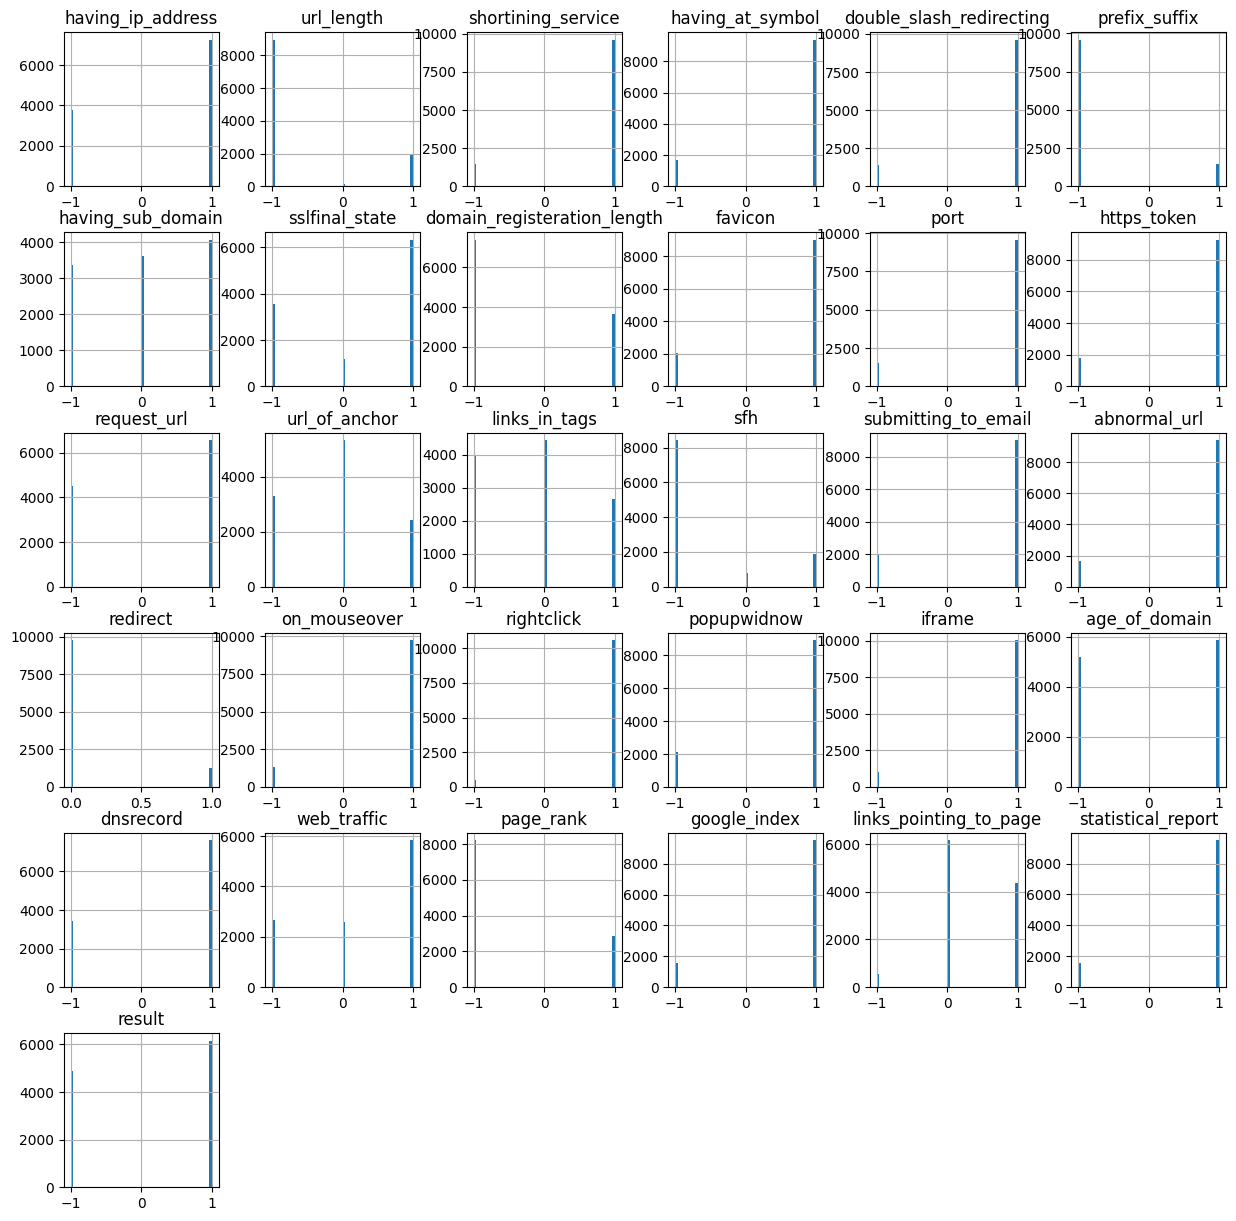

In [22]:
#Plotting the data distribution
df.hist(bins = 50,figsize = (15,15))
plt.show()

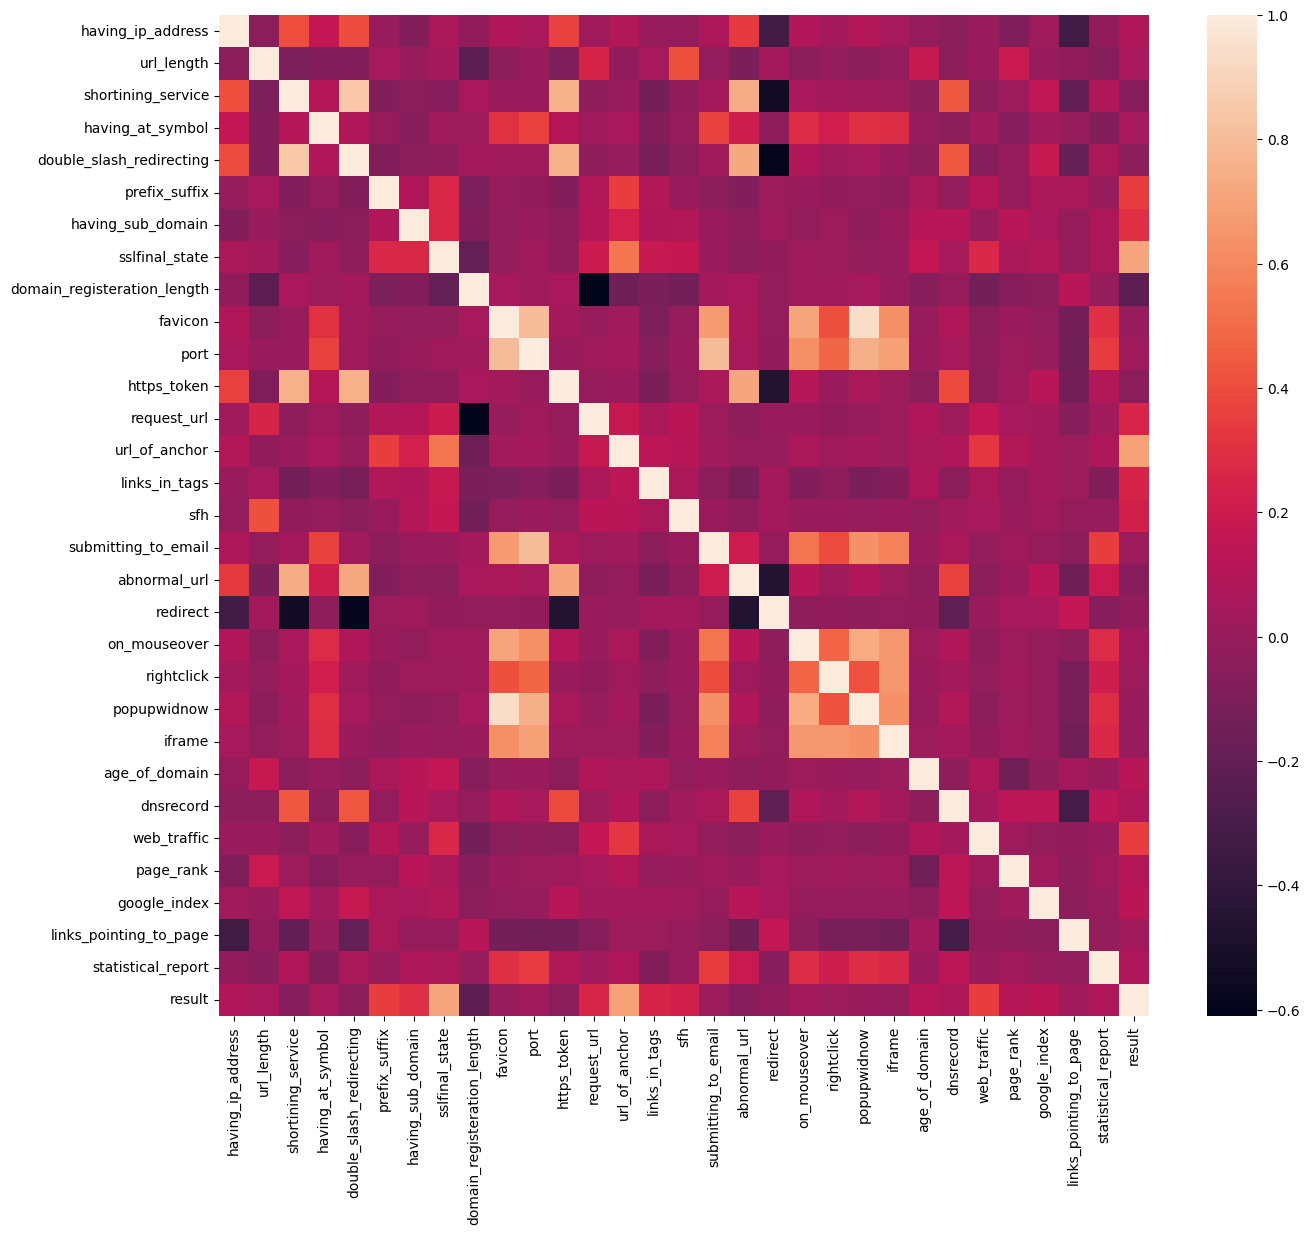

In [23]:
#Correlation heatmap
plt.figure(figsize=(15,13))
sns.heatmap(df.corr())
plt.show()

In [25]:
df.corr().T

having_ip_address  url_length  \
having_ip_address                     1.000000   -0.052411   
url_length                           -0.052411    1.000000   
shortining_service                    0.403461   -0.097881   
having_at_symbol                      0.158699   -0.075108   
double_slash_redirecting              0.397389   -0.081247   
prefix_suffix                        -0.005257    0.055247   
having_sub_domain                    -0.080745    0.003997   
sslfinal_state                        0.071414    0.048754   
domain_registeration_length          -0.022739   -0.221892   
favicon                               0.087025   -0.042497   
port                                  0.060979    0.000323   
https_token                           0.363534   -0.089383   
request_url                           0.029773    0.246348   
url_of_anchor                         0.099847   -0.023396   
links_in_tags                         0.006212    0.052869   
sfh                                  -0.010962    0.414196   
submitting_to_email                   0.077989   -0.014457   
abnormal_url                          0.336549   -0.106761   
redirect                             -0.321181    0.046832   
on_mouseover                          0.084059   -0.045103   
rightclick                            0.042881   -0.013613   
popupwidnow                           0.096882   -0.049381   
iframe                                0.054694   -0.013838   
age_of_domain                        -0.010446    0.179426   
dnsrecord                            -0.050733   -0.040823   
web_traffic                           0.002922    0.008993   
page_rank                            -0.091774    0.183518   
google_index                          0.029153    0.002902   
links_pointing_to_page               -0.339065   -0.022987   
statistical_report                   -0.019103   -0.067153   
result                                0.094160    0.057430   

                             shortining_service  having_at_symbol  \
having_ip_address                      0.403461          0.158699   
url_length                            -0.097881         -0.075108   
shortining_service                     1.000000          0.104447   
having_at_symbol                       0.104447          1.000000   
double_slash_redirecting               0.842796          0.086960   
prefix_suffix                         -0.080471         -0.011726   
having_sub_domain                     -0.041916         -0.058976   
sslfinal_state                        -0.061426          0.031220   
domain_registeration_length            0.060923          0.015522   
favicon                                0.006101          0.304899   
port                                   0.002201          0.364891   
https_token                            0.757838          0.104561   
request_url                           -0.037235          0.027909   
url_of_anchor                          0.000561          0.057914   
links_in_tags                         -0.133379         -0.070861   
sfh                                   -0.022723         -0.008672   
submitting_to_email                    0.049328          0.370123   
abnormal_url                           0.739290          0.203945   
redirect                              -0.534530         -0.028160   
on_mouseover                           0.062383          0.279697   
rightclick                             0.038118          0.219503   
popupwidnow                            0.036616          0.290893   
iframe                                 0.016581          0.284410   
age_of_domain                         -0.052596         -0.005499   
dnsrecord                              0.436064         -0.047872   
web_traffic                           -0.047074          0.032918   
page_rank                              0.014591         -0.064735   
google_index                           0.155844          0.037061   
links_pointing_to_page                -0.19

## 3.2 Data split

In [45]:
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 11)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 11)

In [46]:
df_train = df_train.reset_index(drop = True)
df_val   = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)
df_full_train = df_full_train.reset_index(drop = True)

In [47]:
y_train = df_train.result.values
y_val = df_val.result.values
y_test = df_test.result.values
y_full_train = df_full_train.result.values

In [48]:
del df_train['result']
del df_val['result']
del df_test['result']

In [49]:
X_train = df_train
X_val = df_val
X_test = df_test

In [50]:
df.shape, df_full_train.shape, df_test.shape, df_val.shape, df_train.shape

((11055, 31), (8844, 31), (2211, 30), (2211, 30), (6633, 30))

# 4 Model training, tuning, and selection

In [105]:
#Store accuracies
# Creating holders to store the model performance results
ML_name = []
models_acc_train = []
models_acc_val = []
models_acc_test = []

#function to call for storing the results
def storeResults(model, acu_tr,acu_val, acu_test):
  ML_name.append(model)
  models_acc_train.append(round(acu_tr, 4))
  models_acc_val.append(round(acu_val, 4))
  models_acc_test.append(round(acu_test, 4))

## 4.1 Logistic Regression

In [51]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [52]:
y_pred = model.predict(X_val)
# Step 2: Calculate the accuracy
from sklearn.metrics import accuracy_score

#y_pred = model.predict(X_val)
y_pred = model.predict_proba(df_val)[:, 1]

accuracy = accuracy_score(y_val, y_pred >= 0.5)

print(f"Accuracy: {round(accuracy,2)}")

Accuracy: 0.52


### 4.1.1 Find least impacting feature

In [56]:
#accuracy from above
all_features = X_train.columns.tolist()
acc_diff = 0
feature_m = ''
original_accuracy = accuracy
print('original accuracy', accuracy)
result = {}
for feature in all_features:
    min_features = all_features.copy()
    min_features.remove(feature)
    X_train_m = df_train[min_features]
    
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train_m, y_train)

    X_val_m = df_val[min_features]
    
    y_pred = model.predict_proba(X_val_m)[:, 1]

    accuracy_m = accuracy_score(y_val, y_pred >= 0.5)

    diff = np.round(original_accuracy - accuracy_m, 6)

    #print(f'Feature: {feature} , accuracy: {accuracy_m}, difference : {diff}' ) 

    result[feature] = {'accuracy':accuracy_m, 'difference':diff}


original accuracy 0.5210312075983717


In [57]:
diff_df = pd.DataFrame(result).T
diff_df = diff_df.sort_values(by='difference')
diff_df

accuracy  difference
having_ip_address            0.523745   -0.002714
url_length                   0.523293   -0.002261
sfh                          0.522840   -0.001809
links_pointing_to_page       0.522840   -0.001809
port                         0.522388   -0.001357
prefix_suffix                0.522388   -0.001357
web_traffic                  0.522388   -0.001357
request_url                  0.521936   -0.000905
google_index                 0.521936   -0.000905
iframe                       0.521936   -0.000905
page_rank                    0.521936   -0.000905
on_mouseover                 0.521483   -0.000452
https_token                  0.521483   -0.000452
links_in_tags                0.521483   -0.000452
having_at_symbol             0.521031    0.000000
favicon                      0.521031    0.000000
popupwidnow                  0.521031    0.000000
domain_registeration_length  0.521031    0.000000
rightclick                   0.521031    0.000000
abnormal_url                 0.521031    0.000000
double_slash_redirecting     0.521031    0.000000
dnsrecord                    0.520579    0.000452
submitting_to_email          0.520579    0.000452
having_sub_domain            0.520579    0.000452
statistical_report           0.520579    0.000452
age_of_domain                0.520579    0.000452
shortining_service           0.519674    0.001357
redirect                     0.519222    0.001809
url_of_anchor                0.503844    0.017187
sslfinal_state               0.500678    0.020353

In [59]:
#impact features where difference > 0
impact_features = diff_df[diff_df['difference'] > 0].index
impact_features

Index(['dnsrecord', 'submitting_to_email', 'having_sub_domain',
       'statistical_report', 'age_of_domain', 'shortining_service', 'redirect',
       'url_of_anchor', 'sslfinal_state'],
      dtype='object')

### 4.1.2 Regularized logistic regression

In [60]:
all_features = X_train.columns.tolist()

X_train_c = df_train[all_features]


X_val_c = df_val[all_features]

c_list = [0.01, 0.1, 1, 10, 100]
result ={}
for C in c_list:


    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000, random_state=42)
    model.fit(X_train_c, y_train)

    y_pred = model.predict_proba(X_val_c)[:, 1]

    accuracy_m = accuracy_score(y_val, y_pred >= 0.5) 
   

    diff = np.round(original_accuracy - accuracy_m, 6)

    #print(f'Feature: {feature} , accuracy: {accuracy_m}, difference : {diff}' ) 

    result[C] = {'accuracy':accuracy_m, 'difference':diff}

In [61]:
diff_df = pd.DataFrame(result).T
diff_df = diff_df.sort_values(by='difference')
diff_df

accuracy  difference
0.01    0.522840   -0.001809
0.10    0.521936   -0.000905
1.00    0.521031    0.000000
10.00   0.520127    0.000905
100.00  0.520127    0.000905

Resul train at C =  1

In [62]:
#use impact features to train the model and calculate accuracy
# impact_features
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train[impact_features], y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [63]:
y_pred = model.predict_proba(df_val[impact_features])[:, 1]

accuracy = accuracy_score(y_val, y_pred >= 0.5)

print(f"Accuracy: {round(accuracy,2)}")

Accuracy: 0.52


In [106]:

y_pred = model.predict_proba(X_train[impact_features])[:, 1]
acu_train = accuracy_score(y_train, y_pred >= 0.5)
y_pred = model.predict_proba(X_val[impact_features])[:, 1]
acu_val = accuracy_score(y_val, y_pred >= 0.5)
y_pred = model.predict_proba(X_test[impact_features])[:, 1]
acu_test = accuracy_score(y_test, y_pred >= 0.5)

storeResults('LogisticRegression', acu_train,acu_val, acu_test)


## 4.2 Decision Tree

In [86]:

dt = DecisionTreeClassifier(max_depth=10)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [87]:
y_pred = dt.predict_proba(X_train)[:, 1]
print('predict score using X_train', roc_auc_score(y_train, y_pred))

y_pred = dt.predict_proba(X_val)[:, 1]
print('predict score using X_val', roc_auc_score(y_val, y_pred))


predict score using X_train 0.9942845208616237
predict score using X_val 0.9816843505710083


In [88]:
dt.feature_importances_

array([5.09101971e-03, 1.35221264e-05, 2.46102701e-04, 6.84427629e-04,
       8.30920919e-04, 2.50689173e-02, 2.22318783e-02, 6.95390401e-01,
       4.02230283e-03, 2.41273037e-03, 7.13472807e-04, 2.63571192e-04,
       1.13866423e-02, 1.25761183e-01, 3.01536781e-02, 1.22506079e-02,
       2.05602402e-03, 4.01369683e-04, 2.23288446e-03, 1.40120842e-03,
       4.84042315e-05, 1.99573233e-03, 0.00000000e+00, 5.70655931e-03,
       3.20005891e-03, 2.37710206e-02, 2.94711417e-03, 6.23063871e-03,
       1.16423747e-02, 1.84523223e-03])

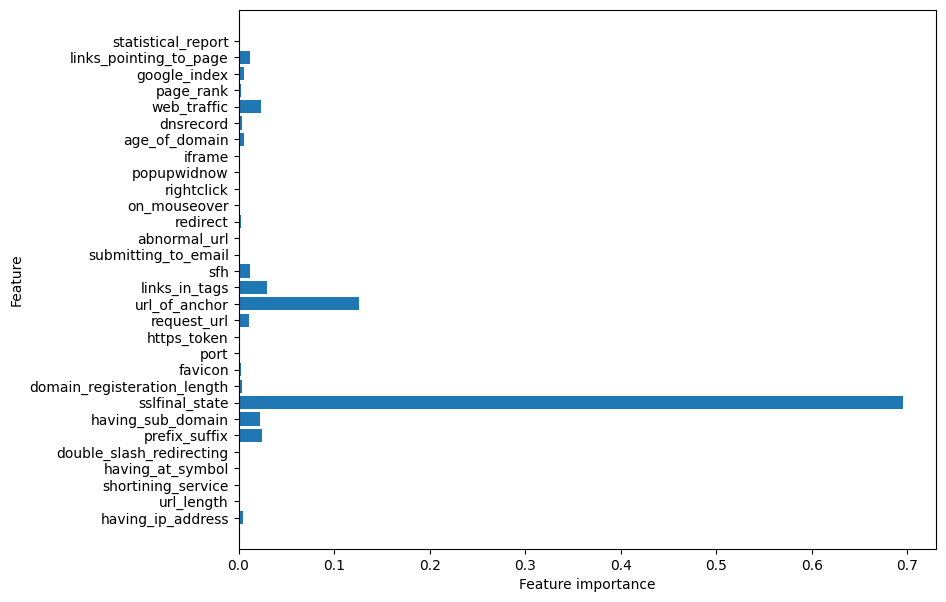

In [89]:

#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), dt.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [91]:
#Select best depth
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]

for depth in depths: 
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.880
   2 -> 0.933
   3 -> 0.957
   4 -> 0.973
   5 -> 0.976
   6 -> 0.983
  10 -> 0.980
  15 -> 0.974
  20 -> 0.972
None -> 0.971


In [92]:
scores = []

for depth in [4, 5, 6, 10]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((depth, s, auc))

In [94]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

max_depth  min_samples_leaf       auc
0          4                 1  0.973153
1          4                 5  0.973153
2          4                10  0.973262
3          4                15  0.971934
4          4                20  0.971934

In [97]:
df_scores['auc'] = round(df_scores['auc'],3)

In [103]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc                     
max_depth            4      5      6      10
min_samples_leaf                            
1                 0.973  0.975  0.982  0.981
5                 0.973  0.976  0.982  0.985
10                0.973  0.976  0.983  0.984
15                0.972  0.975  0.981  0.987
20                0.972  0.975  0.982  0.986
100               0.970  0.974  0.977  0.977
200               0.961  0.963  0.963  0.963
500               0.959  0.959  0.959  0.959

In [104]:
dt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5)

In [107]:
y_pred = dt.predict_proba(X_train)[:, 1]
acu_train = roc_auc_score(y_train, y_pred )
y_pred = dt.predict_proba(X_val)[:, 1]
acu_val = roc_auc_score(y_val, y_pred )
y_pred = dt.predict_proba(X_test)[:, 1]
acu_test = roc_auc_score(y_test, y_pred )

storeResults('DecisionTreeClassifier', acu_train,acu_val, acu_test)

## 4.3 Random Forest Classifier

In [110]:

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10,                            
                            random_state=1,
                            n_jobs=1)
rf.fit(X_train, y_train)

#y_pred = rf.predict_proba(X_val)[:, 1]
y_pred = rf.predict(X_val)

In [111]:
RMSE = np.sqrt(np.mean((y_pred - y_val) ** 2))
RMSE

np.float64(0.3507438628823255)

In [114]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

In [115]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

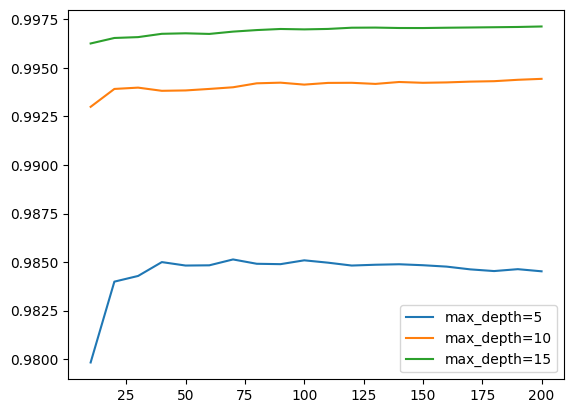

In [116]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

In [117]:
rf = RandomForestClassifier(n_estimators=25,
                                    max_depth=10,
                                    random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=25, random_state=1)

In [118]:
y_pred = rf.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
auc

np.float64(0.9939998677838928)

In [119]:
y_pred = rf.predict_proba(X_train)[:, 1]
acu_train = roc_auc_score(y_train, y_pred )
y_pred = rf.predict_proba(X_val)[:, 1]
acu_val = roc_auc_score(y_val, y_pred )
y_pred = rf.predict_proba(X_test)[:, 1]
acu_test = roc_auc_score(y_test, y_pred )

storeResults('RandomForestClassifier', acu_train,acu_val, acu_test)

## 4.4 Model Comparison

In [120]:
results = pd.DataFrame({ 'ML Model': ML_name,    
    'Train Accuracy': models_acc_train,
    'Validation Accuracy': models_acc_val,
    'Test Accuracy': models_acc_test})
results


ML Model  Train Accuracy  Validation Accuracy  Test Accuracy
0      LogisticRegression          0.5280                0.521         0.5124
1  DecisionTreeClassifier          0.9927                0.985         0.9830
2  RandomForestClassifier          0.9951                0.994         0.9916

Selected model is RandomForestClassifier

rf = RandomForestClassifier(n_estimators=25,
                                    max_depth=10,
                                    random_state=1)

rf.fit(X_train, y_train)

## 4.5 Save Selected Model


In [130]:
dv = DictVectorizer(sparse=False)
X_train_dic = X_train.to_dict(orient='records')
X_train_v = dv.fit_transform(X_train_dic)
rf = RandomForestClassifier(n_estimators=25,
                                    max_depth=10,
                                    random_state=1)

rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, n_estimators=25, random_state=1)

In [138]:
import pickle 

with open('spam_website.bin', 'wb') as f_out:
    pickle.dump((dv, rf), f_out)


### 4.5.1 Checked the saved Model

In [133]:
def predict_single(spam_site, dv, model):
    X = dv.transform([spam_site])
    y_pred = model.predict_proba(X)[:, 1]
    return y_pred[0]

In [134]:
with open('spam_website.bin', 'rb') as f_in:
    dv, model_p = pickle.load(f_in)

In [141]:
site = X_test.iloc[0].to_dict()
pred = predict_single(site, dv, model_p)

pred


c:\Users\ahmed\anaconda3\envs\ml-zoomcamp\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


np.float64(0.9996296296296296)

In [137]:
site

{'having_ip_address': -1,
 'url_length': -1,
 'shortining_service': 1,
 'having_at_symbol': 1,
 'double_slash_redirecting': 1,
 'prefix_suffix': -1,
 'having_sub_domain': 1,
 'sslfinal_state': -1,
 'domain_registeration_length': 1,
 'favicon': 1,
 'port': 1,
 'https_token': 1,
 'request_url': -1,
 'url_of_anchor': -1,
 'links_in_tags': 0,
 'sfh': 1,
 'submitting_to_email': 1,
 'abnormal_url': 1,
 'redirect': 0,
 'on_mouseover': 1,
 'rightclick': 1,
 'popupwidnow': 1,
 'iframe': 1,
 'age_of_domain': -1,
 'dnsrecord': 1,
 'web_traffic': -1,
 'page_rank': -1,
 'google_index': 1,
 'links_pointing_to_page': 1,
 'statistical_report': 1}

========================================